In [1]:
import pandas as pd
import numpy as np
import graphviz 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# Import données

In [2]:
merged_data = pd.read_csv("../result/the_result_file.csv", index_col=0)
merged_data.dropna(inplace=True)

y = merged_data.grav
merged_data_sans_grav = merged_data.drop(['grav'],axis = 1)

# Encoding

In [3]:
def encoding(data):
    colnames = data.columns
    
    result = pd.DataFrame(index=data.index)
    
    for colname in colnames:
        dum = pd.get_dummies(data[colname], prefix=colname)
        result = pd.merge(result, dum, left_index=True, right_index=True)
    return result


encoded = encoding(merged_data)

# Classification

In [6]:
profondeur = 4
clf = tree.DecisionTreeClassifier(max_depth=profondeur)
clf = clf.fit(encoded, y)
graph_data = tree.export_graphviz(clf, out_file=None, feature_names=encoded.columns,  
                         class_names='grav',  
                         filled=True, rounded=True,  
                         special_characters=True)  

# Vizualistaion

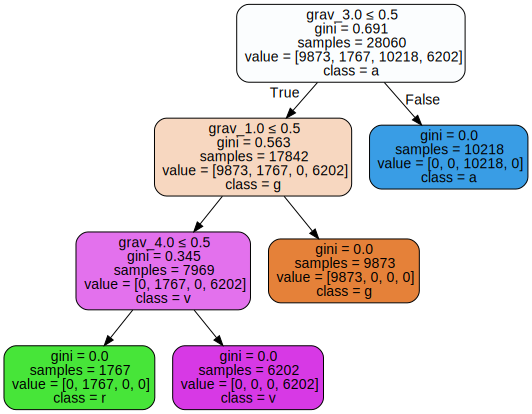

In [7]:
graph = graphviz.Source(graph_data) 

graph

In [24]:
def clf_arbre(data, cible, 
              colonnes=None, 
              criteres=None, 
              colonnes_cibles=None, 
              profondeur=3, 
              print_mode=True, 
              max_leaf_nodes=6, 
              min_samples_leaf=100):
    global a,b
    dat = data
    
    
    
    if not colonnes is None:
        for j in range(len(colonnes)):
            dat = pd.DataFrame(dat[dat[colonnes[j]] == criteres[j]])
            dat = pd.DataFrame(dat.drop(colonnes[j], axis=1))
            
    
    y = pd.DataFrame(dat[cible])
    dat = dat.drop(cible, axis=1)

    if not colonnes_cibles is None:
        dat = pd.DataFrame(dat[colonnes_cibles])
            
    
    
    enco = encoding(dat)
    a=enco
    b=y
    clf = tree.DecisionTreeClassifier(max_depth=profondeur, 
                                      max_leaf_nodes=max_leaf_nodes, 
                                      min_samples_leaf=min_samples_leaf)
    clf = clf.fit(enco, y)
    dot_data = tree.export_graphviz(clf, out_file=None, feature_names=enco.columns,  
                             class_names=cible,  
                             filled=True, rounded=True,  
                             special_characters=True)  
    if print_mode:
        graph = graphviz.Source(dot_data) 
        graph
        return graph
    else:
        return dot_data
        

In [29]:
res = clf_arbre(data=merged_data, cible='grav',colonnes=['catv_gen', 'catvopp_gen'], criteres=[1,1], colonnes_cibles=None)

In [30]:
res.render('../result/ouah', view=True)

'../result/ouah.pdf'